In [0]:
import pandas as pd
cd = pd.read_csv('https://raw.githubusercontent.com/mariacmartins/hackday_malala/master/olist_closed_deals_dataset.csv')
mql = pd.read_csv('https://raw.githubusercontent.com/mariacmartins/hackday_malala/master/olist_marketing_qualified_leads_dataset.csv')

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline

In [0]:
cd.head(2)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0


In [0]:
mql.head(2)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search


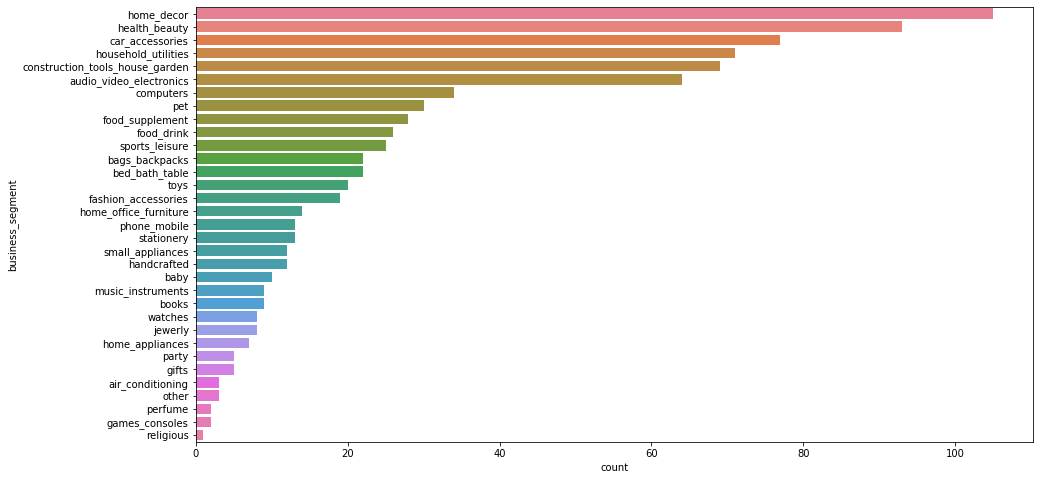

In [0]:
plt.subplots(figsize=(15,8))

_ = sns.countplot(y='business_segment', 
    data=cd, 
    palette='husl', 
    order=cd['business_segment'].value_counts().index)

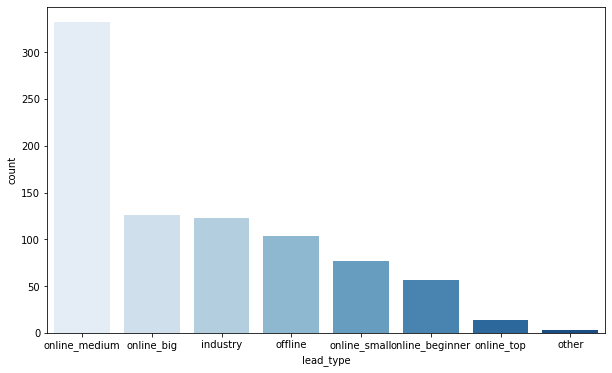

In [0]:
plt.subplots(figsize=(10,6))

_ = sns.countplot(x='lead_type', 
    data=cd, 
    palette='Blues', 
    order=cd['lead_type'].value_counts().index)

In [0]:
mql['origin'].value_counts()

organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

In [0]:
mql_cd = mql.merge(cd, on='mql_id', how='left') #fiz um merge nos 2 datasets mql + cd, chamando o dataset novo de mlq_cd

In [0]:
mql_cd.head(4)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
mql_cd['origin'].value_counts()

organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

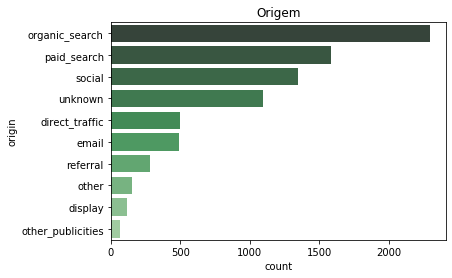

In [0]:
_ = sns.countplot(y='origin', 
    data=mql_cd, 
    palette='Greens_d', 
    order=mql_cd['origin'].value_counts().index).set_title("Origem")

In [0]:
mql['first_contact_date'] = mql['first_contact_date'].astype('datetime64')
ldf = mql.groupby([mql['first_contact_date'].dt.year, mql['first_contact_date'].dt.month]).count()
ldf.index.names = ['year','month']
ldf = ldf.drop(['first_contact_date','landing_page_id','origin'], axis = 1) 
ldf
# ajeitando as info para fazer uma relação de mql_id (marketing qualified lead) por mês/ano do primeiro contato

mql_id
year month        
2017 6           4
     7         239
     8         386
     9         312
     10        416
     11        445
     12        200
2018 1        1141
     2        1028
     3        1174
     4        1352
     5        1303

## **GRÁFICO IMPORTANTE:**

Text(0.5, 1.0, 'Primeiro contato e volume de MQLs no período de Junho de 2017 à Maio de 2018 ')

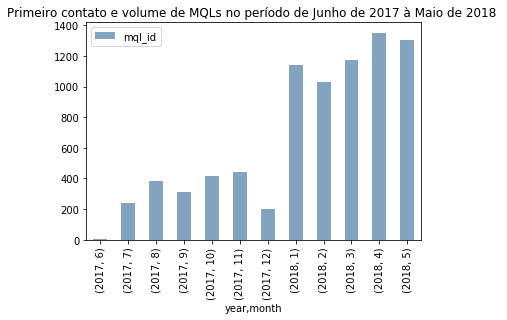

In [0]:
ldf.plot(kind = "bar", color=(0.2, 0.4, 0.6, 0.6)).set_title('Primeiro contato e volume de MQLs no período de Junho de 2017 à Maio de 2018 ')

**Conceitos:** O marketing qualified lead (MQL) ou lead qualificado de marketing refere-se a um contato que demonstrou real interesse no seu produto ou serviço e possui um conjunto de qualificações para avançar no funil de vendas.

In [0]:
mql_cd['business_segment'].value_counts()

home_decor                         105
health_beauty                       93
car_accessories                     77
household_utilities                 71
construction_tools_house_garden     69
audio_video_electronics             64
computers                           34
pet                                 30
food_supplement                     28
food_drink                          26
sports_leisure                      25
bags_backpacks                      22
bed_bath_table                      22
toys                                20
fashion_accessories                 19
home_office_furniture               14
stationery                          13
phone_mobile                        13
handcrafted                         12
small_appliances                    12
baby                                10
music_instruments                    9
books                                9
watches                              8
jewerly                              8
home_appliances          

In [0]:
cd['won_date'] = cd['won_date'].astype('datetime64')
ldf = cd.groupby([cd['won_date'].dt.year, cd['won_date'].dt.month]).count()
ldf.index.names = ['year','month']
ldf.drop(ldf.iloc[:, 1:], inplace = True, axis = 1)
ldf

mql_id
year month        
2017 12          3
2018 1          73
     2         113
     3         147
     4         207
     5         122
     6          57
     7          37
     8          33
     9          23
     10         21
     11          6

## **WON DATE:**

Text(0.5, 1.0, 'Negócios fechados com MQLs por mês/ano ')

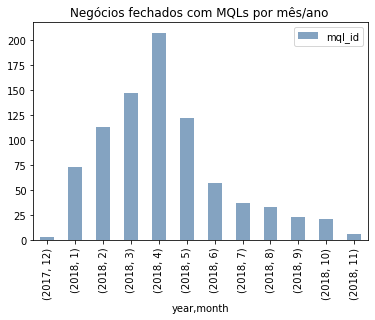

In [0]:
ldf.plot(kind = "bar", color=(0.2, 0.4, 0.6, 0.6)).set_title('Negócios fechados com MQLs por mês/ano ')

In [0]:
mql['first_contact_date(y-m)'] = mql['first_contact_date'].dt.to_period('M')
origin_mql = pd.pivot_table(mql,
                            index='origin',
                            columns='first_contact_date(y-m)',
                            values='mql_id',                            
                            aggfunc='count',
                            fill_value=0)

# Sort index from largest to smallest in volume
origin_df = mql.groupby('origin').mql_id \
                                   .count() \
                                   .sort_values(ascending=False) \
                                   .index

origin_mql = origin_mql.reindex(origin_df)
origin_mql

first_contact_date(y-m),2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
origin,,,,,,,,,,,,
organic_search,0,54,122,78,125,121,60,412,291,340,349,344
paid_search,0,56,79,64,100,70,35,170,212,262,272,266
social,0,12,45,56,52,95,39,162,156,139,325,269
unknown,1,35,70,39,53,63,25,151,156,186,166,154
direct_traffic,0,16,22,22,23,26,10,82,65,80,75,78
email,1,19,24,23,30,37,12,61,68,74,50,94
referral,0,8,16,12,8,20,9,41,34,38,45,53
other,0,12,3,9,8,3,1,39,16,22,26,11
display,1,19,2,5,5,6,5,11,18,16,19,11


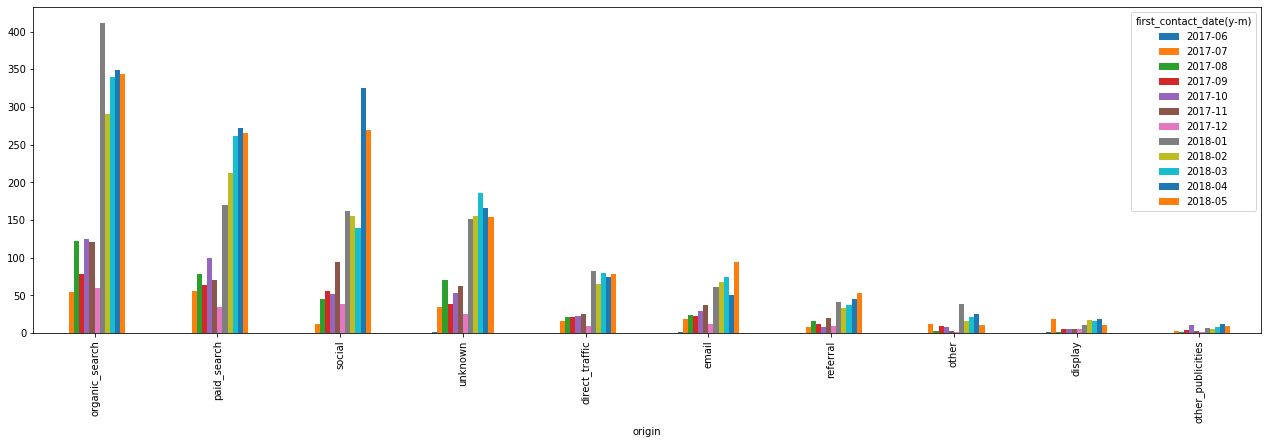

In [0]:
origin_mql.plot(kind='bar', figsize=(22, 6))

Heatmap: **Relação entre canal de origem e primeiro contatos dos MQLs por mês/ano (Junho de 2017 a Maio de 2018)**

Text(0.5, 1, 'Relação entre canal de origem e primeiro contatos dos MQLs por mês/ano (Junho de 2017 a Maio de 2018)')

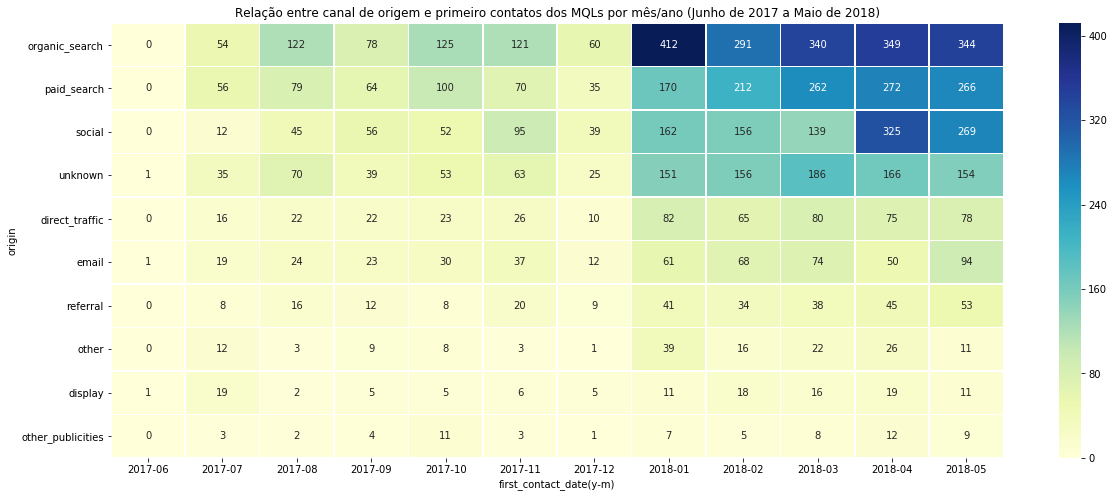

In [0]:
plt.figure(figsize=(20,8))
sns.heatmap(origin_mql, annot=True, fmt='g', cmap="YlGnBu", linewidths=.5).set_title('Relação entre canal de origem e primeiro contatos dos MQLs por mês/ano (Junho de 2017 a Maio de 2018)')


In [0]:
#encontrando o tempo em que os negócios foram fechados
mql_cd.first_contact_date = pd.to_datetime(mql_cd.first_contact_date)
mql_cd.won_date = pd.to_datetime(mql_cd.won_date)
mql_cd['negocio_fechado'] = mql_cd.won_date-mql_cd.first_contact_date

In [0]:
mql_cd.head()


,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,negocio_fechado
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,5 days 19:58:54


In [0]:
mql_cd = mql_cd.drop(667)


In [0]:
mql_cd_new = mql_cd.drop(['has_company','has_gtin','average_stock','declared_product_catalog_size'], axis = 1) 

#filling the rest NAs
columns = ['lead_behaviour_profile','origin','business_segment','lead_type','business_type']
mql_cd_new[columns] = mql_cd_new[columns].fillna('unknown')

In [0]:
mql_cd_new.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue,negocio_fechado
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,unknown,unknown,unknown,unknown,NaN,NaT
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaT,unknown,unknown,unknown,unknown,NaN,NaT
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaT,unknown,unknown,unknown,unknown,NaN,NaT
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaT,unknown,unknown,unknown,unknown,NaN,NaT
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0,5 days 19:58:54


In [0]:
mql_cd_new['negocio_fechado'] = mql_cd_new['negocio_fechado'].astype('timedelta64[h]') / 24

In [0]:
mql_cd_new['won_date'] = mql_cd_new['won_date'].dt.to_period('M')

new = pd.pivot_table(mql_cd_new,
                            index='lead_behaviour_profile',
                            columns='won_date',
                            values='mql_id',                            
                            aggfunc='count',
                            fill_value=0)

new2 = mql_cd_new.groupby('lead_behaviour_profile').mql_id \
                                   .count() \
                                   .sort_values(ascending=False) \
                                   .index

new_new = new.reindex(new2)
new_new




won_date,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
lead_behaviour_profile,,,,,,,,,,,,
unknown,3,73,61,16,9,4,4,3,3,0,1,0
cat,0,0,34,78,138,74,28,19,17,9,7,3
eagle,0,0,9,28,34,30,7,7,1,2,4,1
wolf,0,0,9,19,19,12,12,7,4,7,6,0
shark,0,0,0,6,7,2,3,0,3,2,1,0
"cat, wolf",0,0,0,0,0,0,1,1,2,3,0,1
"eagle, wolf",0,0,0,0,0,0,1,0,1,0,0,1
"eagle, cat",0,0,0,0,0,0,1,0,1,0,1,0
"shark, wolf",0,0,0,0,0,0,0,0,1,0,0,0


Heatmap: Data de fechamento de negócios, MQLs e perfil de comportamento de leads 

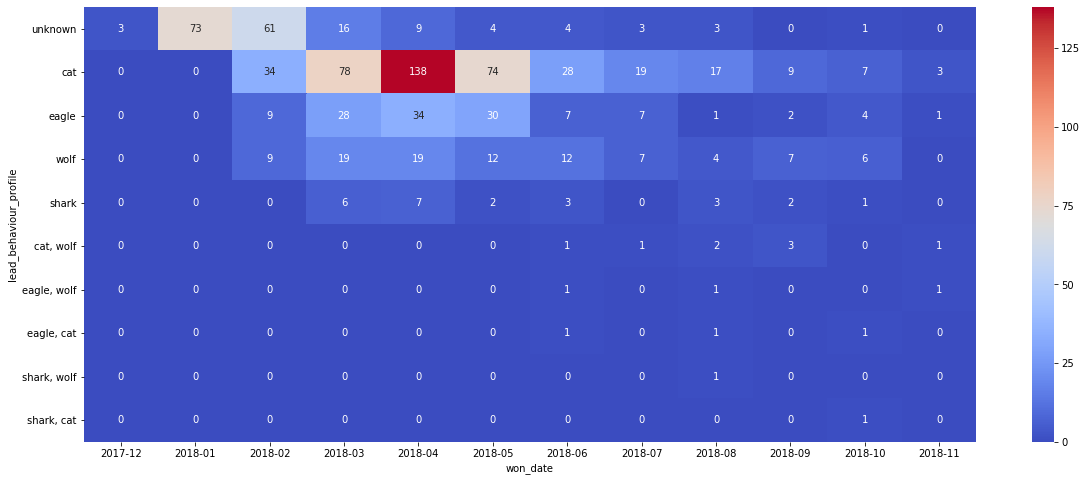

In [0]:
plt.figure(figsize=(20,8))
sns.heatmap(new_new, annot=True, fmt='g', cmap="coolwarm")

In [0]:
mql_cd['seller_id(bool)'] = mql_cd['seller_id'].notna()

mql_cd[['seller_id', 'seller_id(bool)']].head()

,seller_id,seller_id(bool)
0,NaN,False
1,NaN,False
2,NaN,False
3,NaN,False
4,2c43fb513632d29b3b58df74816f1b06,True


In [0]:
mql_cd['first_contact_date(y-m)'] = mql_cd['first_contact_date'].dt.to_period('M')


Text(0.5, 1.0, 'Negócios fechados entre junho de 2017 e maio de 2018')

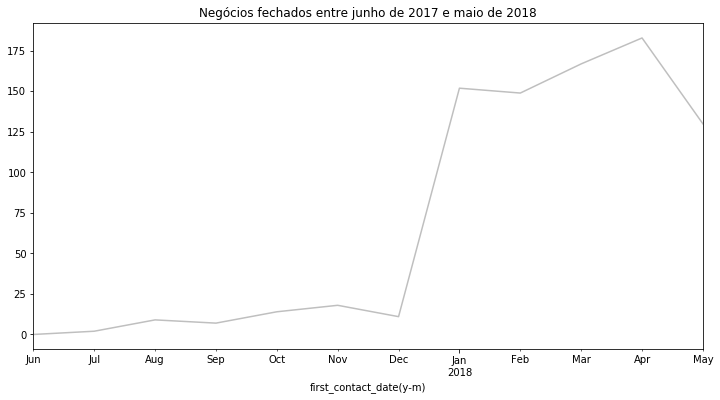

In [0]:
mes_cd = mql_cd.groupby('first_contact_date(y-m)')['seller_id(bool)'].sum()
mes_cd.plot.line(figsize=(12, 6),  color='0.75')
plt.title('Negócios fechados entre junho de 2017 e maio de 2018')

In [0]:
mql_cd['sr_id'].value_counts()

4ef15afb4b2723d8f3d81e51ec7afefe    133
d3d1e91a157ea7f90548eef82f1955e3     82
6565aa9ce3178a5caf6171827af3a9ba     74
85fc447d336637ba1df43e793199fbc8     64
495d4e95a8cf8bbf8b432b612a2aa328     63
fbf4aef3f6915dc0c3c97d6812522f6a     59
2695de1affa7750089c0455f8ce27021     59
de63de0d10a6012430098db33c679b0b     53
9ae085775a198122c5586fa830ff7f2b     51
c638112b43f1d1b86dcabb0da720c901     36
060c0a26f19f4d66b42e0d8796688490     32
068066e24f0c643eb1d089c7dd20cd73     27
a8387c01a09e99ce014107505b92388c     26
9e4d1098a3b0f5da39b0bc48f9876645     24
56bf83c4bb35763a51c2baab501b4c67     24
34d40cdaf94010a1d05b0d6212f9e909     10
4b339f9567d060bcea4f5136b9f5949e      9
9749123c950bf8363ace42cb1c2d0815      7
9d12ef1a7eca3ec58c545c678af7869c      6
0a0fb2b07d841f84fb6714e35c723075      1
b90f87164b5f8c2cfa5c8572834dbe3f      1
6aa3b86a83d784b05f0e37e26b20860d      1
Name: sr_id, dtype: int64

SDRs e SRs x perfis de comportamento dos leads

## SR/SDR Otimização de vendas:
**Quais SDRs e SRs devem falar com cada tipo de lead, de acordo com a personalidade?**

In [0]:
# Tabela de SDRs
mql_cd = mql_cd[mql_cd['lead_behaviour_profile'].notna()].copy()
sdr = mql_cd['sdr_id'].value_counts().index
lbp = mql_cd['lead_behaviour_profile'].value_counts().index

lbp_sdr = pd.pivot_table(mql_cd,
                             index='lead_behaviour_profile',
                             columns='sdr_id',
                             values='seller_id',
                             aggfunc='count',
                             fill_value=0)

lbp_sdr = lbp_sdr.reindex(lbp)[sdr]
lbp_sdr


sdr_id,4b339f9567d060bcea4f5136b9f5949e,9d12ef1a7eca3ec58c545c678af7869c,a8387c01a09e99ce014107505b92388c,9e4d1098a3b0f5da39b0bc48f9876645,068066e24f0c643eb1d089c7dd20cd73,370c9f455f93a9a96cbe9bea48e70033,f42a2bd194f7802ab052a815c8de65b7,09285259593c61296eef10c734121d5b,34d40cdaf94010a1d05b0d6212f9e909,56bf83c4bb35763a51c2baab501b4c67,b90f87164b5f8c2cfa5c8572834dbe3f,0a0fb2b07d841f84fb6714e35c723075,de63de0d10a6012430098db33c679b0b,e7dff61b78bebffa71678e126ce669ad,45749fb708130f78d0db07d8d80f030b,fdb16d3cbbeb5798f2f66c4096be026d,9749123c950bf8363ace42cb1c2d0815,2b63542749aa9caf15f21816da1db341,323cff2ceea1814239bc2c7e614d260d,33dd30594303eb0ebe12a556d612c437,b34f6eba10f46bf9a657a01c108a8284,0cdad77786224a7cefea567b8c75c3c1,6aa3b86a83d784b05f0e37e26b20860d,19f3cd308f1455b3fa09a282e0d496f4,282f16e20d50cb18d05182e80f6b9dd6,084b6fbb10729ed4da8c3d3f5a3ae7c9,5b7ce8c2b0fe4c2f52a0763046914ef4,e4a6222cdb5b34375400904f03d8e6a5,b1b3ec93fc27a19fdb1c1b1fc997776a
cat,52,35,50,37,43,26,23,25,30,24,15,10,8,4,3,5,3,2,2,3,1,2,1,1,0,1,1,0,0
eagle,9,22,4,10,3,14,7,8,8,16,4,12,2,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
wolf,42,6,3,3,3,7,7,7,1,0,3,1,2,2,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0
shark,8,0,0,3,2,2,1,2,2,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
"cat, wolf",1,0,0,0,0,1,1,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1
"eagle, wolf",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
"eagle, cat",0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"shark, cat",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"shark, wolf",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1, 'SDR e perfil de comportamento do lead - seller')

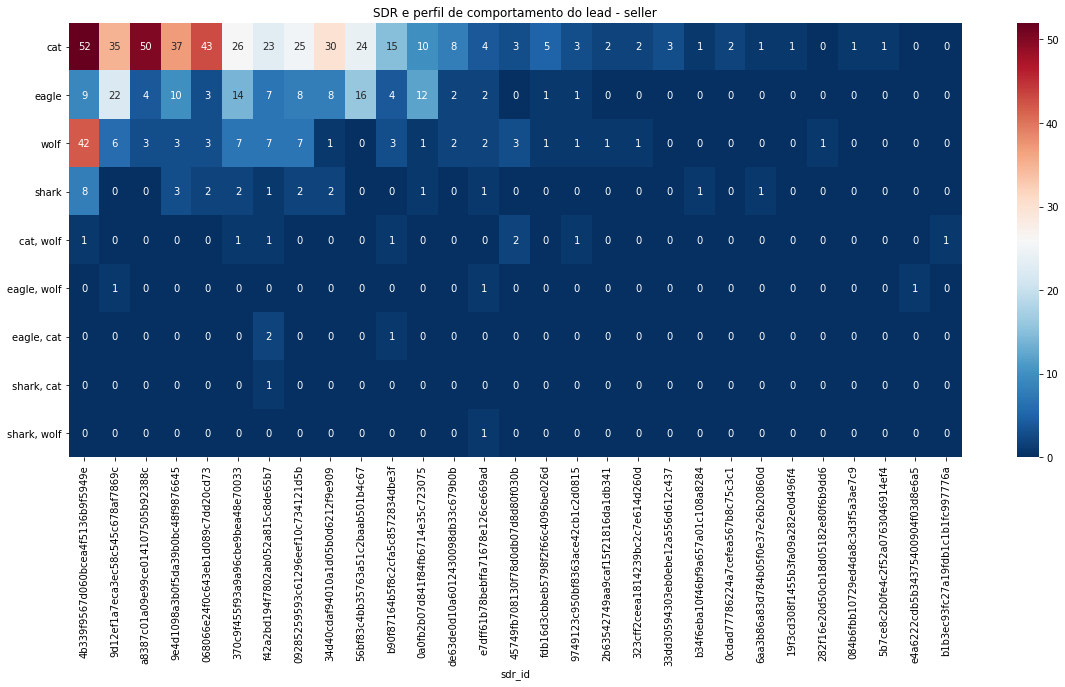

In [0]:
plt.figure(figsize=(20,8))
sns.heatmap(lbp_sdr, annot=True, fmt='g', cmap="RdBu_r").set_title('SDR e perfil de comportamento do lead - seller')

In [0]:

# Tabela de SRS
sr = mql_cd['sr_id'].value_counts().index
lbp = mql_cd['lead_behaviour_profile'].value_counts().index

lbp_sr = pd.pivot_table(mql_cd,
                             index='lead_behaviour_profile',
                             columns='sr_id',
                             values='seller_id',
                             aggfunc='count',
                             fill_value=0)

lbp_sr = lbp_sr.reindex(lbp)[sr]
lbp_sr

sr_id,4ef15afb4b2723d8f3d81e51ec7afefe,85fc447d336637ba1df43e793199fbc8,6565aa9ce3178a5caf6171827af3a9ba,d3d1e91a157ea7f90548eef82f1955e3,de63de0d10a6012430098db33c679b0b,2695de1affa7750089c0455f8ce27021,495d4e95a8cf8bbf8b432b612a2aa328,fbf4aef3f6915dc0c3c97d6812522f6a,c638112b43f1d1b86dcabb0da720c901,068066e24f0c643eb1d089c7dd20cd73,060c0a26f19f4d66b42e0d8796688490,9e4d1098a3b0f5da39b0bc48f9876645,a8387c01a09e99ce014107505b92388c,9ae085775a198122c5586fa830ff7f2b,56bf83c4bb35763a51c2baab501b4c67,34d40cdaf94010a1d05b0d6212f9e909,4b339f9567d060bcea4f5136b9f5949e,9749123c950bf8363ace42cb1c2d0815,9d12ef1a7eca3ec58c545c678af7869c,6aa3b86a83d784b05f0e37e26b20860d,0a0fb2b07d841f84fb6714e35c723075,b90f87164b5f8c2cfa5c8572834dbe3f
cat,58,41,31,28,37,34,30,30,17,11,15,16,14,12,17,3,7,2,3,0,1,0
eagle,23,7,13,12,7,9,6,9,5,7,2,6,6,4,2,4,0,0,0,0,0,1
wolf,12,11,11,11,5,6,7,2,3,4,6,0,3,5,2,0,2,4,1,0,0,0
shark,0,4,0,2,4,2,2,2,0,1,1,2,0,1,2,0,0,1,0,0,0,0
"cat, wolf",2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0,1,1,0,0
"eagle, wolf",0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
"eagle, cat",0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
"shark, cat",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"shark, wolf",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1, 'SRs e perfil de comportamento de leads - sellers')

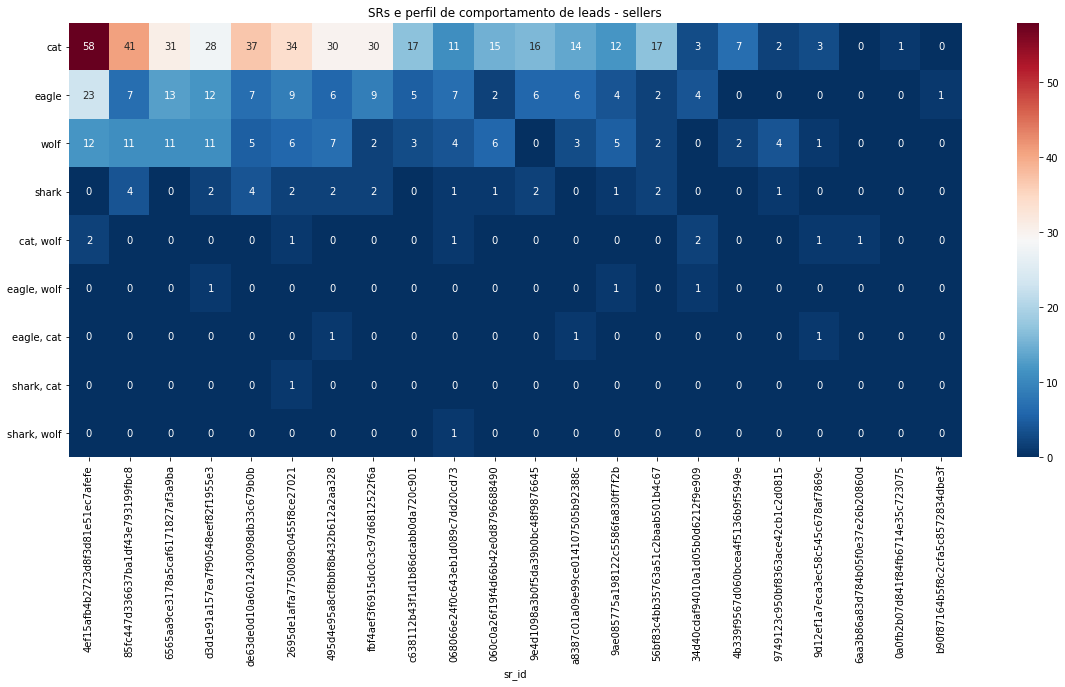

In [0]:
plt.figure(figsize=(20,8))
sns.heatmap(lbp_sr, annot=True, fmt='g', cmap="RdBu_r").set_title('SRs e perfil de comportamento de leads - sellers')

In [0]:
mql_cd['sr_id'].value_counts()

4ef15afb4b2723d8f3d81e51ec7afefe    95
85fc447d336637ba1df43e793199fbc8    63
6565aa9ce3178a5caf6171827af3a9ba    55
d3d1e91a157ea7f90548eef82f1955e3    54
de63de0d10a6012430098db33c679b0b    53
2695de1affa7750089c0455f8ce27021    53
495d4e95a8cf8bbf8b432b612a2aa328    46
fbf4aef3f6915dc0c3c97d6812522f6a    43
c638112b43f1d1b86dcabb0da720c901    25
068066e24f0c643eb1d089c7dd20cd73    25
060c0a26f19f4d66b42e0d8796688490    24
9e4d1098a3b0f5da39b0bc48f9876645    24
a8387c01a09e99ce014107505b92388c    24
9ae085775a198122c5586fa830ff7f2b    23
56bf83c4bb35763a51c2baab501b4c67    23
34d40cdaf94010a1d05b0d6212f9e909    10
4b339f9567d060bcea4f5136b9f5949e     9
9749123c950bf8363ace42cb1c2d0815     7
9d12ef1a7eca3ec58c545c678af7869c     6
6aa3b86a83d784b05f0e37e26b20860d     1
0a0fb2b07d841f84fb6714e35c723075     1
b90f87164b5f8c2cfa5c8572834dbe3f     1
Name: sr_id, dtype: int64